# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [2]:
"""
* The following assumes 'Jupyter Notebook' command is run where the dataset 'pima-indians-diabetes-1.data' resides
* Configure os path accordingly if your current working directory is different
"""

col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes-1.data", names= col_names)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
pima_df.sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
657,1,120,80,48,200,38.9,1.162,41,0
589,0,73,0,0,0,21.1,0.342,25,0
431,3,89,74,16,85,30.4,0.551,38,0
42,7,106,92,18,0,22.7,0.235,48,0
720,4,83,86,19,0,29.3,0.317,34,0
310,6,80,66,30,0,26.2,0.313,41,0
704,4,110,76,20,100,28.4,0.118,27,0
721,1,114,66,36,200,38.1,0.289,21,0
697,0,99,0,0,0,25.0,0.253,22,0
366,6,124,72,0,0,27.6,0.368,29,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
for col_name in pima_df.columns:
    pima_df[col_name] = pima_df[col_name].replace(0,pima_df[col_name].median())

In [6]:
pima_df.sample(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
118,4,97,60,23,30.5,28.2,0.443,22,0
589,3,73,72,23,30.5,21.1,0.342,25,0
317,3,182,74,23,30.5,30.5,0.345,29,1
347,3,116,72,23,30.5,23.5,0.187,23,0
681,3,162,76,36,30.5,49.6,0.364,26,1


In [7]:
pima_df[pima_df.isnull().any(axis=1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12D6DFB0>,
      dtype=object)

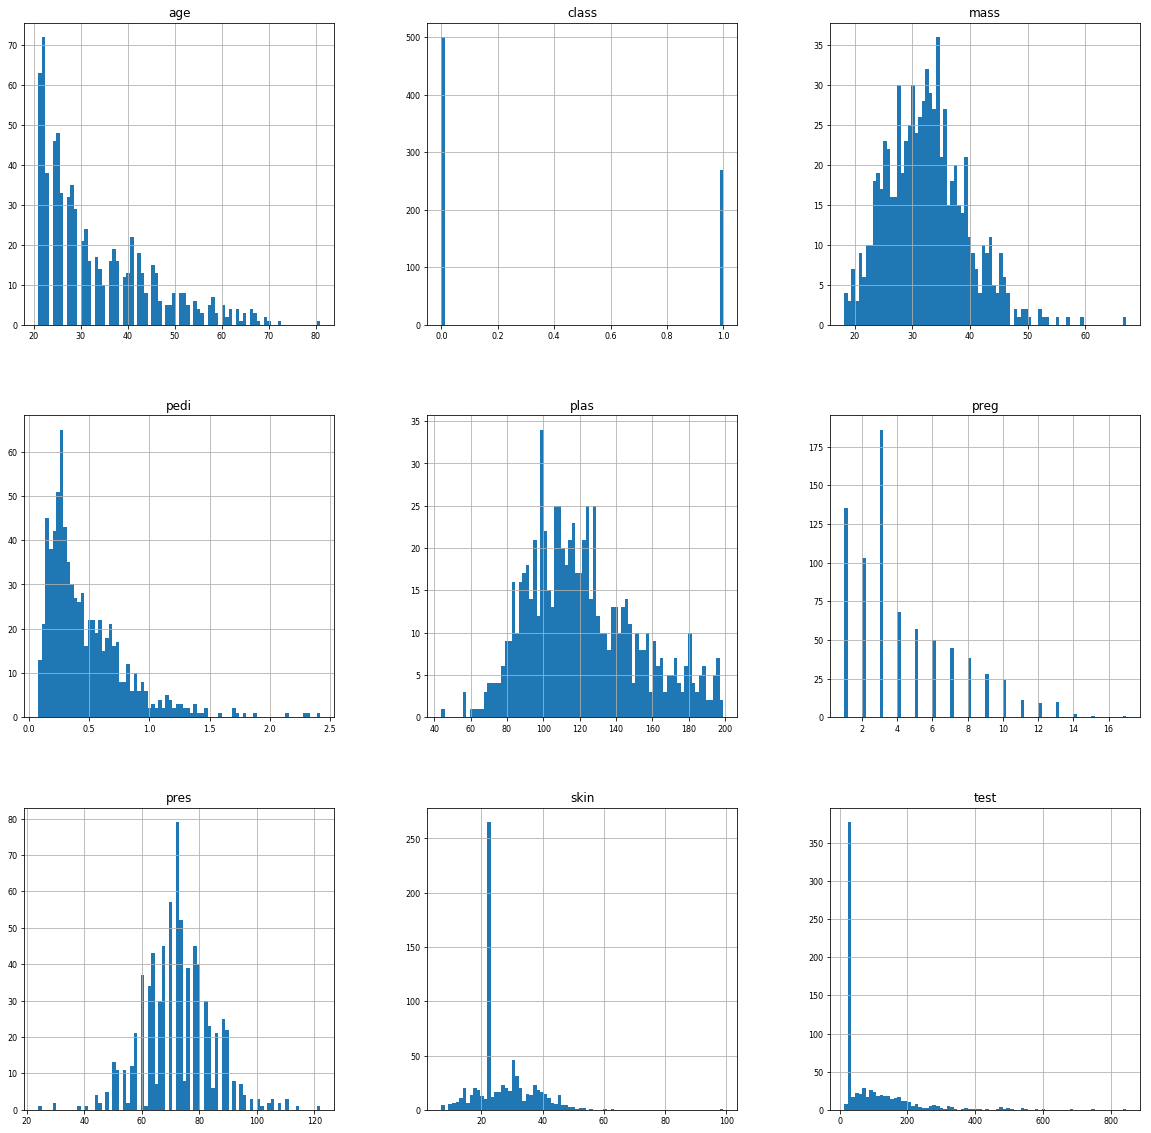

In [9]:
pima_df.hist(figsize=(20, 20), bins=80, xlabelsize=8, ylabelsize=8)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [10]:
pima_df.skew(numeric_only  = True)

preg     1.111795
plas     0.535587
pres     0.141885
skin     1.223057
test     2.693181
mass     0.601059
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

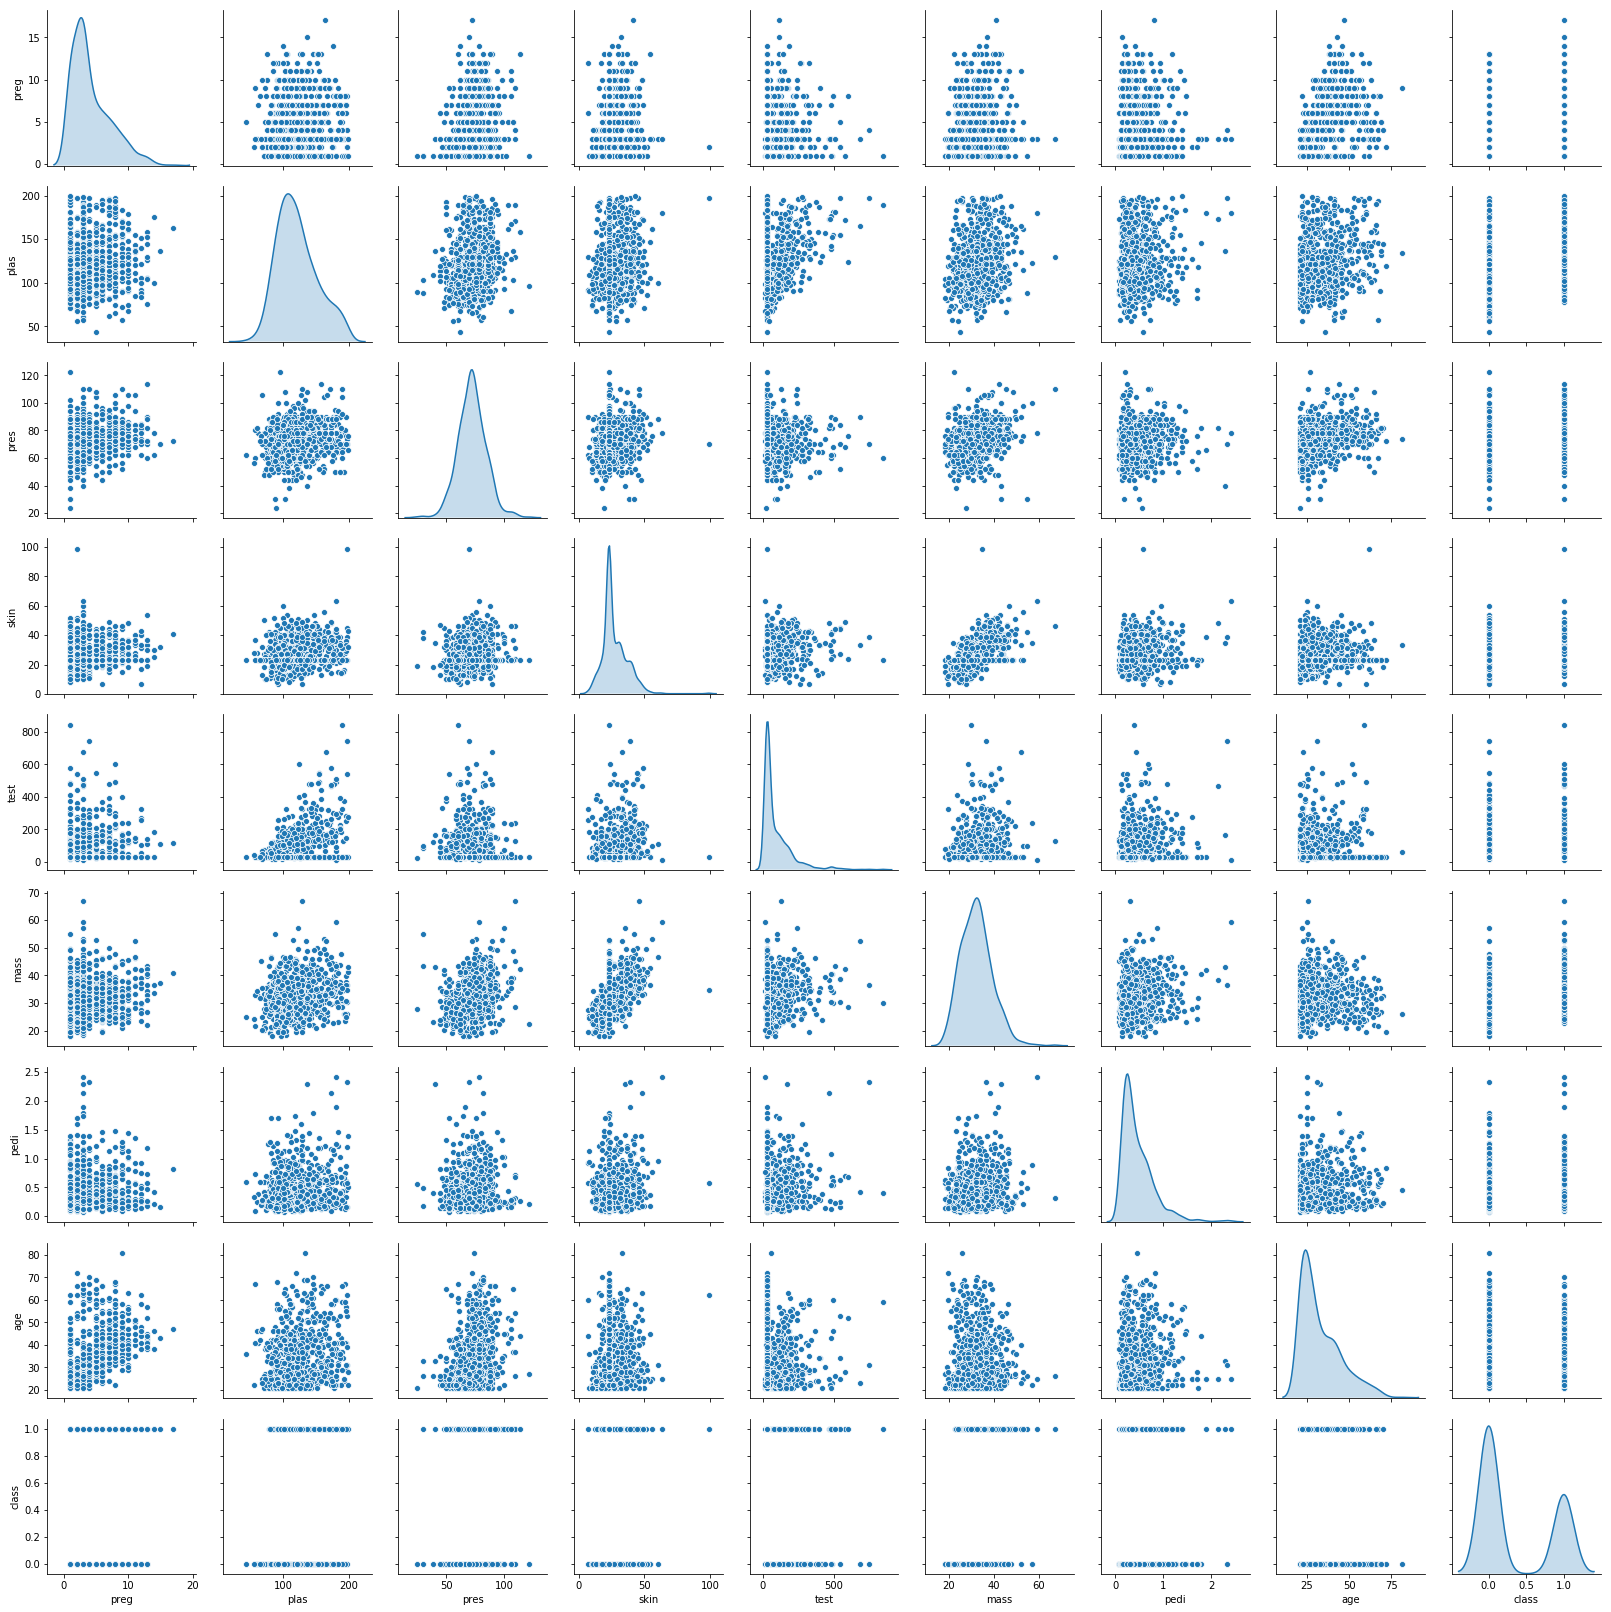

In [11]:
sns.pairplot(pima_df , diag_kind='kde')

In [12]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
plas,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
pres,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


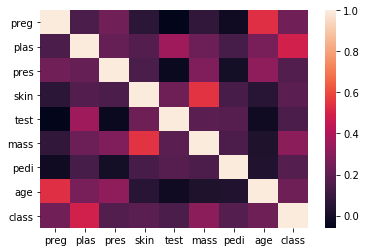

In [13]:
sns.heatmap(pima_df.corr())

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [14]:
from sklearn.model_selection import train_test_split
X = pima_df.drop('class', axis=1)
Y = pima_df.pop('class')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
X_train.shape

(537, 8)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [18]:
dt_model.score(X_train , y_train)

1.0

In [19]:
from sklearn.metrics import confusion_matrix
y_predict = dt_model.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_predict,y_test))

Confusion Matrix:
 [[113  34]
 [ 33  51]]


Print the feature importance of the decision model - Optional

In [20]:
pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
preg,0.081739
plas,0.239635
pres,0.147913
skin,0.037077
test,0.013682
mass,0.251440
pedi,0.109580
age,0.118934


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 51)
rfcl = rfcl.fit(X_train, y_train)

In [22]:
dt_model.score(X_test , y_test)

0.70995670995671

In [23]:
y_predict = rfcl.predict(X_test)
print(confusion_matrix(y_predict,y_test))

[[126  33]
 [ 20  52]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = abcl.fit(X_train, y_train)

In [25]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.7012987012987013


In [26]:
print(metrics.confusion_matrix(y_test, y_predict))

[[111  35]
 [ 34  51]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [27]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)

In [28]:
print(bgcl.score(X_test , y_test))

0.7792207792207793


In [29]:
print(metrics.confusion_matrix(y_test, y_predict))

[[127  19]
 [ 32  53]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl2 = gbcl.fit(X_train, y_train)

In [31]:
y_predict = gbcl2.predict(X_test)

In [32]:
print(gbcl2.score(X_test , y_test))

0.7965367965367965


In [33]:
print(metrics.confusion_matrix(y_test, y_predict))

[[126  20]
 [ 27  58]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [34]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import VotingClassifier

In [35]:
rf_est = ensemble.RandomForestClassifier(n_estimators = 750, criterion = 'gini', max_features = 'sqrt', max_depth = 3, min_samples_split = 4, min_samples_leaf = 2, n_jobs = 50, random_state = 42, verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators = 900, learning_rate = 0.0008, loss = 'exponential', min_samples_split = 3, min_samples_leaf = 2, max_features ='sqrt', max_depth = 3,  random_state = 42, verbose = 1)

In [36]:
et_est = ensemble.ExtraTreesClassifier(n_estimators = 750, max_features = 'sqrt', max_depth = 35,  n_jobs = 50, criterion = 'entropy', random_state = 42, verbose = 1)

In [37]:
voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],
                                       voting = 'soft', weights = [3,5,2],
                                       n_jobs = 50)

In [38]:
voting_est.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weigh...timators=750, n_jobs=50,
           oob_score=False, random_state=42, verbose=1, warm_start=False))],
         flatten_transform=None, n_jobs=50, voting='soft',
         weights=[3, 5, 2])

In [39]:
print("VotingClassifier Score: " + str(voting_est.score(X_train, y_train)))

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.1s finished


VotingClassifier Score: 0.9143389199255121


In [40]:
print("VotingClassifier Estimators: " + str(voting_est.estimators_))

VotingClassifier Estimators: [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=50,
            oob_score=False, random_state=42, verbose=1, warm_start=False), GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0008, loss='exponential', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False), ExtraTreesC

In [41]:
y_predict = voting_est.predict(X_test)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished


In [42]:
print(voting_est.score(X_test , y_test))

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s


0.7662337662337663


[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished


In [43]:
print(metrics.confusion_matrix(y_test, y_predict))

[[136  10]
 [ 44  41]]
